In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None)

In [3]:
print(df.shape)
df.head()

(303, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


- **age**
- **sex**
  * 0 = female
  * 1 = male
- **cp**: chest pain
  * 1 = typical angina
  * 2 = atypical angina
  * 3 = non-anginal pain
  * 4 = asymptomatic
- **restbp**: resting blood pressure, in mm Hg
- **chol**: serum cholesterol in mg/dl
- **fbs**: fasting blood sugar
  * 0 = fbs >= 120 mg/dl
  * 1 = fbs < 120 mg/dl
- **restecg**: resting ecg results
  * 1 = normal
  * 2 = having ST-T wave abnormality
  * 3 = showing probable or definite left ventricular hyperthropy
- **thalach**: maximum heart rate achieved
- **exang**: exercise induced angina
  * 0 = no
  * 1 = yes
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: the slope of the peak exercise ST segment
  * 1 = upsloping
  * 2 = flat
  * 3 = downsloping
- **ca**: number of major vessels (0-3) colored by fluoroscopy
- **thal**: thalium heart scan
  * 3 = normal (no cold spots)
  * 6 = fixed defect (colp spots during rest and exercise)
  * 7 = reversible defect (when cold spots only appear during exercise)
- **hd**: diagnosis of Heart Diseases, target value

In [4]:
df.columns = ['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [6]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [7]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [8]:
missing_mask = (df['ca'] == '?') | (df['thal'] == '?')
df[missing_mask].shape[0]

6

In [9]:
df[missing_mask]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [10]:
print(f"{df[missing_mask].shape[0]/df.shape[0]*100:0.2f} % missing values")

1.98 % missing values


In [11]:
df_no_missing = df[~missing_mask]

In [12]:
len(df_no_missing)

297

In [13]:
df_no_missing = df_no_missing.astype({'ca': np.float64,
                                      'thal': np.float64})

In [14]:
X = df_no_missing.drop('hd', axis=1)

In [15]:
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [16]:
y = df_no_missing['hd']
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [17]:
X_dummies = pd.get_dummies(X, columns = ['cp',
                             'restecg',
                             'slope',
                             'thal'
                            ])
X_dummies.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [18]:
y.unique()

array([0, 2, 1, 3, 4])

Turning the problem into binary classification, either has heart diseases or not.

In [19]:
y.replace(to_replace=[2, 3, 4], value=1, inplace=True)
y.unique()

array([0, 1])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=42)

In [21]:
tree = DecisionTreeClassifier(random_state=42)
fitted_tree = tree.fit(X_train, y_train)

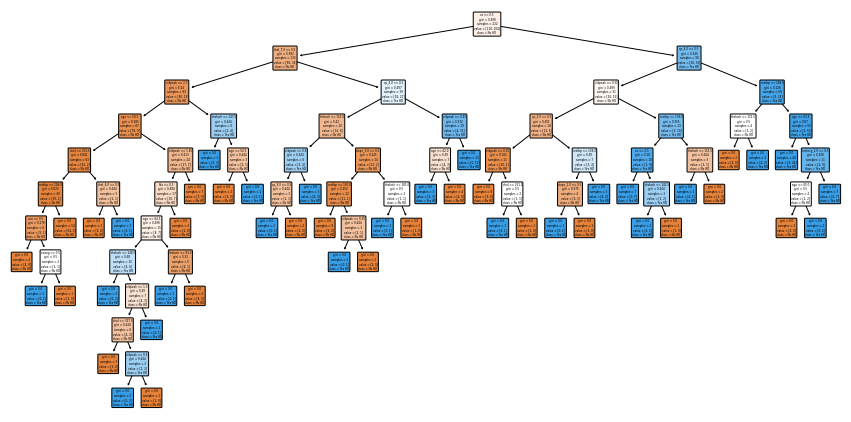

In [22]:
plt.figure(figsize=(15, 7.5))
plot_tree(fitted_tree,
         filled = True,
         rounded = True,
         class_names = ['No HD', 'Yes HD'],
         feature_names = X_dummies.columns)
plt.show()

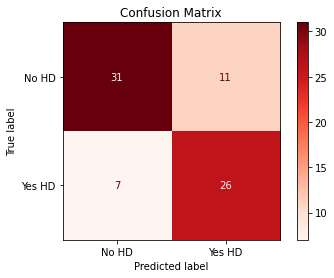

In [23]:
plot_confusion_matrix(fitted_tree,
                      X_test,
                      y_test,
                      display_labels=['No HD', 'Yes HD'],
                      cmap=plt.cm.Reds,
                      normalize=None)
plt.title('Confusion Matrix')
plt.show()

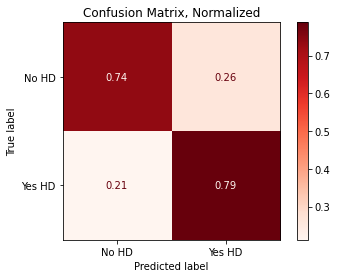

In [24]:
plot_confusion_matrix(fitted_tree,
                      X_test,
                      y_test,
                      display_labels=['No HD', 'Yes HD'],
                      cmap=plt.cm.Reds,
                      normalize='true')
plt.title('Confusion Matrix, Normalized')
plt.show()

# Cost Complexity Pruning
### Visualizing alpha

In [25]:
path = fitted_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1] # Exclusing the max value for alpha that would prune all leaves, leaving only a root instead of a tree.

In [26]:
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(ccp_alpha = ccp_alpha,
                                  random_state = 42)
    tree.fit(X_train, y_train)
    trees.append(tree)

In [27]:
train_scores = [tree.score(X_train, y_train) for tree in trees]
test_scores = [tree.score(X_test, y_test) for tree in trees]

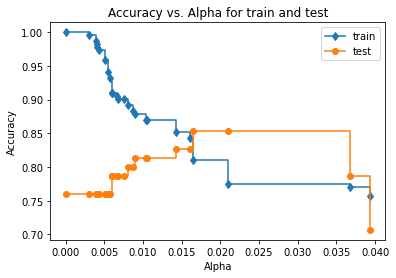

In [28]:
fig, ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.set_title("Accuracy vs. Alpha for train and test")
ax.plot(ccp_alphas, train_scores, marker = 'd', label = 'train', drawstyle = 'steps-post') #, drawstyle = 'steps-post'
ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()

For the test set, the accuracy is maximum when alpha is around 0.016.

When applying **Cost Complexity Pruning** on a single **Classification Tree**, values for alpha go from 0 to 1 included, because GINI scores go from 0 to 1.  
Values for alpha for a **Regression Tree** can be much larger, since the sum of squared residuals can go from 0 to positive infinity.

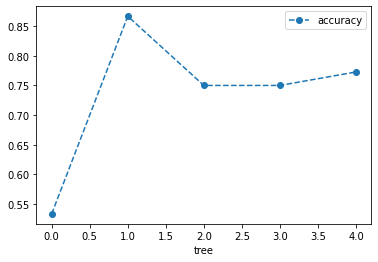

In [29]:
tree = DecisionTreeClassifier(ccp_alpha = 0.016,
                              random_state = 42)

scores = cross_val_score(tree, X_train, y_train, cv=5)
df_cv = pd.DataFrame(data = {'tree': np.arange(5), 'accuracy': scores})
df_cv.plot(x = 'tree', y = 'accuracy', marker = 'o', linestyle = '--')
plt.show()

The graph shows that using different **train** and **test** data with the same alpha resulted in different accuracies, suggesting that alpha is sensitive to the datasets.  
Let's use cross validation to find the optimal value for ccp_alpha.

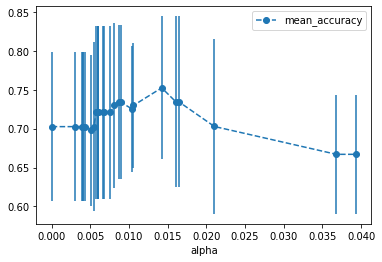

In [30]:
alpha_values = []

for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(ccp_alpha = ccp_alpha,
                                  random_state = 42)
    scores = cross_val_score(tree, X_train, y_train, cv = 5)
    alpha_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_values, columns = ['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x = 'alpha',
                   y = 'mean_accuracy',
                   yerr = 'std',
                   marker = 'o',
                   linestyle = '--'
                  )
plt.show()

In [31]:
alpha_results.head()

,alpha,mean_accuracy,std
0,0.000000,0.702525,0.095323
1,0.002953,0.702525,0.095323
2,0.003861,0.702525,0.095323
3,0.004054,0.702525,0.095323
4,0.004095,0.702525,0.095323


In [32]:
max_mask = alpha_results['mean_accuracy'] == np.max(alpha_results['mean_accuracy'])
alpha_results[max_mask]

,alpha,mean_accuracy,std
20,0.014225,0.752323,0.091956


In [33]:
best_alpha = np.float64(alpha_results[max_mask]['alpha'])

In [34]:
tree_pruned = DecisionTreeClassifier(ccp_alpha = best_alpha,
                                     random_state = 42)
tree_pruned = tree_pruned.fit(X_train, y_train)

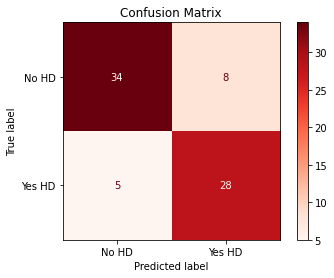

In [35]:
plot_confusion_matrix(tree_pruned,
                      X_test,
                      y_test,
                      display_labels=['No HD', 'Yes HD'],
                      cmap=plt.cm.Reds,
                      normalize=None)
plt.title('Confusion Matrix')
plt.show()

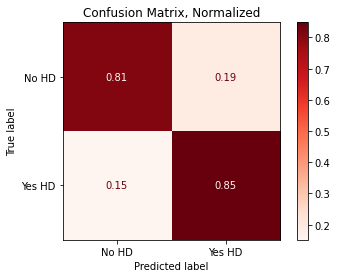

In [36]:
plot_confusion_matrix(tree_pruned,
                      X_test,
                      y_test,
                      display_labels=['No HD', 'Yes HD'],
                      cmap=plt.cm.Reds,
                      normalize='true')
plt.title('Confusion Matrix, Normalized')
plt.show()

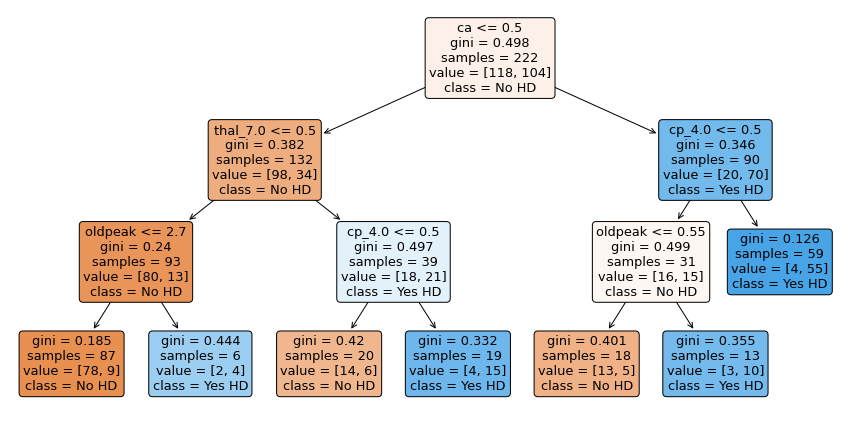

In [37]:
plt.figure(figsize=(15, 7.5))
plot_tree(tree_pruned,
         filled = True,
         rounded = True,
         class_names = ['No HD', 'Yes HD'],
         feature_names = X_dummies.columns)
plt.show()